In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Se importa el dataset

Se lee el dataset con read_csv, el dataset se puede encontrar en:


https://www.kaggle.com/datasets/pythonafroz/solar-powe-generation-data/download?datasetVersionNumber=2

In [ ]:
df = pd.read_csv('Solar Power Plant Data.csv')

In [ ]:
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [ ]:
print(f'The data frame has {df.shape[0] } rows and {df.shape[1]} columns')

The data frame has 8760 rows and 8 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WindSpeed,8760.0,2.639823,1.628754,0.0,1.4,2.3,3.60000,10.9
Sunshine,8760.0,11.180479,21.171295,0.0,0.0,0.0,7.00000,60.0
AirPressure,8760.0,1010.361781,12.793971,965.9,1002.8,1011.0,1018.20000,1047.3
Radiation,8760.0,97.538493,182.336029,-9.3,-6.2,-1.4,115.60000,899.7
AirTemperature,8760.0,6.978893,7.604266,-12.4,0.5,6.4,13.40000,27.1
RelativeAirHumidity,8760.0,76.719406,19.278996,13.0,64.0,82.0,93.00000,100.0
SystemProduction,8760.0,684.746071,1487.454665,0.0,0.0,0.0,464.24995,7701.0


Se renombro la columna 'Date-Hour(NMT)' a 'Datetime' para poder utilizarla como indice de forma mas clara

In [ ]:
df.rename(columns = {'Date-Hour(NMT)' : 'Datetime'}, inplace = True)

df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index,
                         infer_datetime_format = True)

In [ ]:
df.head(3)

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
Datetime,,,,,,,
2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0


## Crear nuevas caracteristicas

Se crearon nuevas caracteristicas a partir del indice para poder realizar graficas respecto a valores especificos de las fechas.

In [ ]:
def create_features(df):
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['day_of_month'] = df.index.day
    df['day_of_year'] = df.index.dayofyear
    df['week_of_year'] = df.index.isocalendar().week
    return df

In [ ]:
create_features(df)

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,hour,day_of_week,quarter,month,day_of_month,day_of_year,week_of_year
Datetime,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0,0,6,1,1,1,1,52
2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0,1,6,1,1,1,1,52
2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0,2,6,1,1,1,1,52
2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0,3,6,1,1,1,1,52
2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0,4,6,1,1,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,4.1,0,988.2,-4.8,-0.7,94,0.0,19,6,4,12,31,365,52
2017-12-31 20:00:00,2.1,0,987.3,-5.0,-0.3,95,0.0,20,6,4,12,31,365,52
2017-12-31 21:00:00,1.8,0,986.7,-5.3,0.2,93,0.0,21,6,4,12,31,365,52


## Grafico Produccion de energia por hora

Para darnos una idea de como es la produccion diaria de energia y en que horas son los picos mas altos de esta produccion.

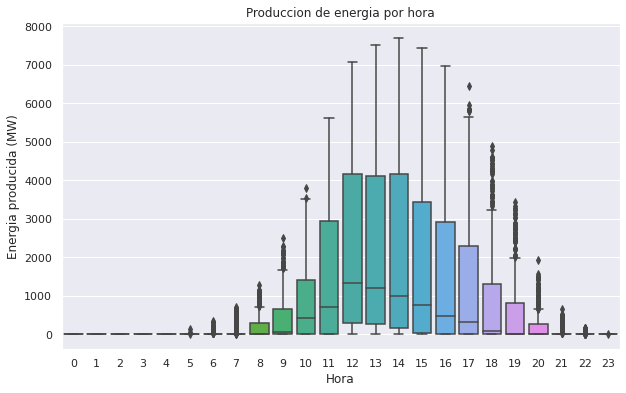

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = 'hour',
           y = 'SystemProduction',
           data = df)
plt.ylabel('Energia producida (MW)')
plt.xlabel('Hora')
plt.title('Produccion de energia por hora')
plt.show()

## Grafico Produccion de energia por mes

Para darnos una idea de como es la produccion mensual de energia y en que meses se presentan los picos mas altos de esta produccion.

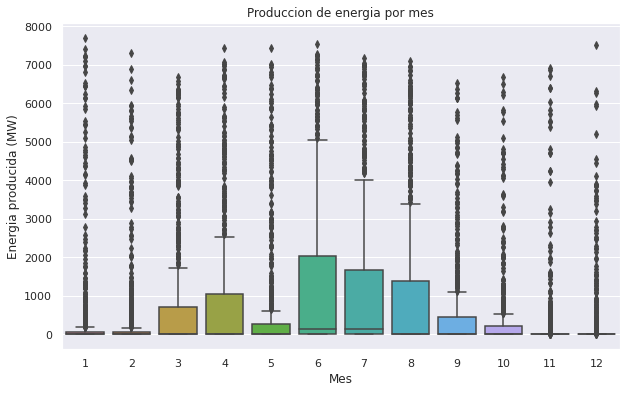

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = 'month',
           y = 'SystemProduction',
           data = df)
plt.ylabel('Energia producida (MW)')
plt.xlabel('Mes')
plt.title('Produccion de energia por mes')
plt.show()

## Preparacion de los datos

Separacion de los datos en conjuntos de entrenamiento y pruebas para el entrenamiento del modelo

In [ ]:
train = df.loc[df.index < '2017-10-01']
test = df.loc[df.index >= '2017-10-01']

# Conjunto de entrenamiento
X_train = train.drop(columns = ['SystemProduction'])
y_train = train['SystemProduction']

# Conjunto de pruebas
X_test = test.drop(columns = ['SystemProduction'])
y_test = test['SystemProduction']

X_train['week_of_year'] = X_train['week_of_year'].astype(np.float64)
X_test['week_of_year'] = X_test['week_of_year'].astype(np.float64)

In [ ]:
#Entrenamiento del modelo
clf = GradientBoostingRegressor(learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=1000)
clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, min_samples_leaf=2,
                          n_estimators=1000)

In [ ]:
# Predicciones
y_preds = clf.predict(X_test)

# Hacemos una copia del DF de pruebas
test_copy = test.copy()

# Agregamos las predicciones al DF
test_copy['predictions'] = y_preds

# Obtenemos una semana del DF para graficar
fw = test_copy.loc[(test_copy.index <= '2017-10-07')]

## Resultados

Grafica del resultado final comparando el orignial respecto a la produccion obtenida por el modelo.

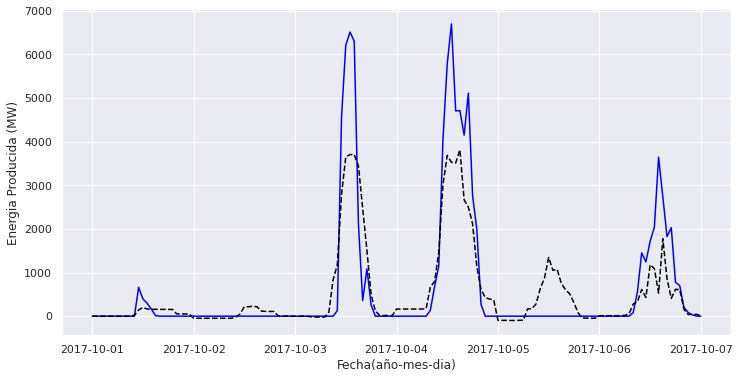

In [ ]:
# Grafico
sns.set()
plt.figure(figsize=(12, 6))
sns.lineplot(data = fw, x = fw.index, y='SystemProduction', color = 'blue')
sns.lineplot(data = fw, x = fw.index, y = 'predictions', color = 'black', linestyle = 'dashed')
plt.ylabel('Energia Producida (MW)')
plt.xlabel('Fecha(año-mes-dia)')
plt.show()